In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [0]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [0]:
ls data

men_shoes.csv


In [0]:
df = pd.read_csv('data/men_shoes.csv')
df.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(18280, 48)

In [0]:
df = pd.read_csv('data/men_shoes.csv', low_memory=False)
df.shape

(18280, 48)

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
mean_price = np.mean( df['prices_amountmin'] )
mean_price

93.53952188183217

In [0]:
[3] * 5 

[3, 3, 3, 3, 3]

In [0]:
y_true = df['prices_amountmin']
y_true.shape

(18280,)

In [0]:
y_true = df['prices_amountmin']
y_pred =[mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

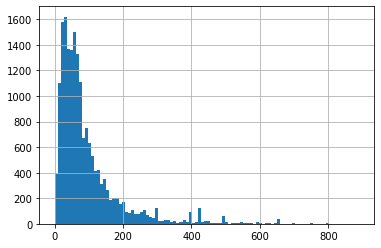

In [0]:
y_true = df['prices_amountmin'].hist(bins=100)

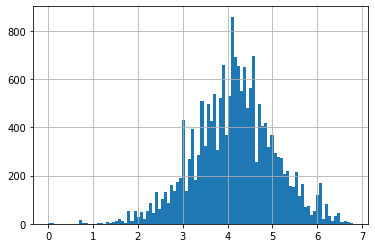

In [0]:
np.log( df['prices_amountmin'] + 1 ).hist(bins=100)

In [0]:
np.log(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [0]:
np.log(0 + 1)

0.0

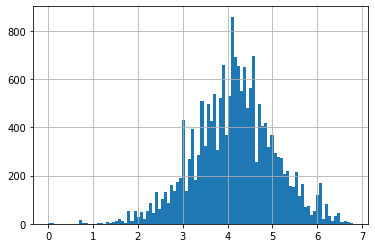

In [0]:
np.log1p( df['prices_amountmin'] ).hist(bins=100)

In [0]:
np.log1p(0)

0.0

In [0]:
y_true = df['prices_amountmin']
y_pred =[np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [0]:
np.median(y_true)

64.95

In [0]:
y_true = df['prices_amountmin']
price_log_mean = np.mean( np.log1p(y_true) )
y_pred = [] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

ValueError: ignored

In [0]:
np.log1p(y_true)

0        3.710886
1        3.970103
2        3.714060
3        3.937886
4        3.855664
           ...   
18275    3.432373
18276    4.188897
18277    3.510948
18278    3.480625
18279    4.290459
Name: prices_amountmin, Length: 18280, dtype: float64

In [0]:
np.mean( np.log1p(y_true) )

4.157759197235119

In [0]:
np.exp( np.mean( np.log1p(y_true) ) ) -1

62.92811169273113

In [0]:
y_true = df['prices_amountmin']
price_log_mean = np.mean( np.log1p(y_true) ) - 1
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

90.39055118822142

In [0]:
np.expm1( np.mean( np.log1p(y_true) ) )

62.92811169273113

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
df.brand.value_counts()

Nike                         1709
PUMA                          574
Ralph Lauren                  524
New Balance                   361
VANS                          356
                             ... 
Emu                             1
Fit & Fresh                     1
Walk Over                       1
Adidas Outdoors                 1
Earrings-MidwestJewellery       1
Name: brand, Length: 1856, dtype: int64

In [0]:
df['brand'].factorize()

(array([  0,   0,   1, ..., 411, 411, 411]),
 Index(['Josmo', 'SERVUS BY HONEYWELL', 'NATIVE', 'MAUI AND SONS', 'Twisted X',
        'Lacoste', 'Rubies', 'unbranded', 'PUMA', 'Filament',
        ...
        'Bindi', 'Holloway Sportswear', 'River City', 'AH by Android Homme',
        'SEG', 'American Rag', 'BININBOX', 'HEAD', 'Swix', 'Xray, XRay'],
       dtype='object', length=1856))

In [0]:
df['brand'].factorize()[0]

array([  0,   0,   1, ..., 411, 411, 411])

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [0]:
feats = ['brand_cat']
X = df[ feats ].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

cross_val_score(model, X, y, scoring='neg_mean_absolute_error')

array([-57.89947522, -57.73227208, -52.50719535, -58.06843816,
       -65.72540391])

In [0]:
feats = ['brand_cat']
X = df[ feats ].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
feats = ['brand_cat']

def run_model(feats):
  X = df[ feats ].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [0]:
def run_model(feats):
  X = df[ feats ].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [0]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [0]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

In [0]:
feats = ['manufacturer_cat']
X = df[ feats ].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

cross_val_score(model, X, y, scoring='neg_mean_absolute_error')

array([-64.01382959, -61.24878356, -57.77143235, -64.85814779,
       -67.7760531 ])

In [0]:
feats = ['manufacturer_cat']

def run_model(feats):
  X = df[ feats ].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [0]:
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [0]:
run_model(['manufacturer_cat', 'brand_cat'])

(-58.53930419908596, 4.311223231615436)

In [62]:
git add day4.ipynb

SyntaxError: ignored